# Project 2

In [1]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.cluster import KMeans, DBSCAN

In [2]:
#import dataset
original_election_data = pd.read_csv("merged_train.csv")
#original_election_data.head()
#original_election_data.count()

In [3]:
#import dataset
test_data = pd.read_csv("demographics_test.csv")
#test_data.head()

In [4]:
demo_data = original_election_data[original_election_data['Party'] == 1]
repub_data = original_election_data[original_election_data['Party'] != 1]

## Task 1 : Partition dataset into training and validation sets 

In [5]:
#using Holdout method
#data for regression
demo_x_train, demo_x_val, demo_y_train, demo_y_val = train_test_split(demo_data.iloc[:,:-3], demo_data['Democratic'], test_size = 0.25, random_state=0)
repub_x_train, repub_x_val, repub_y_train, repub_y_val = train_test_split(repub_data.iloc[:,:-3], repub_data['Republican'], test_size = 0.25, random_state=0)
#demo_x_train.head()
#repub_x_train.iloc[:,3:]

In [6]:
#data for classification
x_train, x_val, y_train, y_val = train_test_split(original_election_data.iloc[:,:-3], original_election_data['Party'], test_size = 0.25, random_state=0)
#x_train.count()

In [7]:
#data for clustering
data_x = original_election_data.iloc[:,:-3]
#x_train.head()
data_y = original_election_data['Party']
#y_train

## Task 2 : Standardizing training and validation sets

In [8]:
scaler = StandardScaler()
scaler.fit(demo_x_train.iloc[:,3:])
demo_x_train_scaled = scaler.transform(demo_x_train.iloc[:,3:])
demo_x_train_scaled = pd.DataFrame(demo_x_train_scaled)
demo_x_val_scaled = scaler.transform(demo_x_val.iloc[:,3:])
demo_x_val_scaled = pd.DataFrame(demo_x_val_scaled)
demo_x_train_scaled.head()

0         1         2         3         4         5         6  \
0  0.571991 -0.015969  0.431683 -0.215691  0.150430  0.065124 -0.019613   
1 -0.341879  0.297695 -0.429587 -0.354652  0.784827  0.190601  1.700255   
2 -0.017362 -2.816989 -0.668060  5.093024  2.709282  0.405988  2.146285   
3 -0.425754  0.924469 -0.481791 -0.486309 -0.700225 -0.972676 -0.710357   
4 -0.541861 -2.382244 -0.679626  4.158091 -0.904283 -0.931108  0.167070   

          7         8         9        10        11        12  
0 -0.670799  2.466109 -0.464199 -0.634122 -1.022479 -0.989852  
1 -0.958376  0.035039 -0.521649 -1.092099 -2.097044  0.175597  
2 -1.799042 -0.957206 -0.323786  3.999273  0.901557 -1.072713  
3  0.212147 -0.137649  0.420887 -0.036103  0.656381  0.927946  
4  1.047807 -2.084500 -1.372440  0.106856  1.276802  1.911467

In [9]:
scaler = StandardScaler()
scaler.fit(repub_x_train.iloc[:,3:])
repub_x_train_scaled = scaler.transform(repub_x_train.iloc[:,3:])
repub_x_train_scaled = pd.DataFrame(repub_x_train_scaled)
repub_x_val_scaled = scaler.transform(repub_x_val.iloc[:,3:])
repub_x_val_scaled = pd.DataFrame(repub_x_val_scaled)

In [10]:
scaler = StandardScaler()
scaler.fit(x_train.iloc[:,3:])
x_train_scaled = scaler.transform(x_train.iloc[:,3:])
x_train_scaled = pd.DataFrame(x_train_scaled)
x_val_scaled = scaler.transform(x_val.iloc[:,3:])
x_val_scaled = pd.DataFrame(x_val_scaled)

In [11]:
scaler = StandardScaler()
scaler.fit(data_x.iloc[:,3:])
data_x_scaled = scaler.transform(data_x.iloc[:,3:])
data_x_scaled = pd.DataFrame(data_x_scaled)

In [12]:
scaler = StandardScaler()
scaler.fit(test_data.iloc[:,3:])
test_data_scaled = scaler.transform(test_data.iloc[:,3:])
test_data_scaled = pd.DataFrame(test_data_scaled)

## Task 3 : Build Linear Regression Model

### For Democratic Party

#### Using all attributes

In [13]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = demo_x_train_scaled, y = demo_y_train)
print("Coefficients are : ",fitted_model.coef_)
print("\nIntercept is : ",fitted_model.intercept_)

Coefficients are :  [103624.81621321  -4266.71421325  -3820.7434915   -4479.42316769
  -5484.01243206    413.41199685 -11448.16943487  -4760.86121281
   -717.04138946   2886.76855164   5759.19791935 -24072.38083839
  -3283.54262932]

Intercept is :  67233.13168724279


In [14]:
predicted = fitted_model.predict(demo_x_val_scaled)
predicted[predicted < 0] = 0   #handling negative predicted votes
print(predicted[:20])

[ 35534.52933747      0.         289390.53377784  41410.28474565
  30078.00063559  30345.97233835 125468.32434078  50493.68867609
   8709.78445235  27884.6632366       0.              0.
 299071.08036352  78768.93503579 211997.95497578   2473.60545759
      0.              0.         103623.5702214  102778.38477861]


In [15]:
corr_coef = np.corrcoef(predicted,demo_y_val)[1,0]
print("Coefficient of Correlation = ",corr_coef)
R_squared = corr_coef ** 2
print("R square = ",R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(demo_y_val)-1)/(len(demo_y_val)-len(demo_x_train_scaled.columns-1))
print("Adjusted R square = ",adj_R_squared)

Coefficient of Correlation =  0.956841277604584
R square =  0.9155452305279727
Adjusted R square =  0.9008574445328374


In [16]:
#print(np.sqrt(np.mean((demo_y_val-predicted)**2)))
rmse = m.sqrt(mean_squared_error(demo_y_val, predicted))
print("Root mean square error(RMSE) = ",rmse)

Root mean square error(RMSE) =  43023.32759732205


#### Testing by selecting diffferent attributes

In [17]:
#cols = [0,1,3,6,7,8,10,11,12]
demo_cols = [0,6,9,11]

In [18]:
model = linear_model.LinearRegression()
demo_fitted_model = model.fit(X = demo_x_train_scaled.iloc[:,demo_cols], y = demo_y_train)
print("Coefficients are : ",demo_fitted_model.coef_)
print("\nIntercept is : ",demo_fitted_model.intercept_)

Coefficients are :  [103165.80239653  -6096.93418642   5266.84827431 -20585.67995092]

Intercept is :  67233.13168724279


In [19]:
predicted = demo_fitted_model.predict(demo_x_val_scaled.iloc[:, demo_cols])
predicted[predicted < 0] = 0

In [20]:
corr_coef = np.corrcoef(predicted,demo_y_val)[1,0]
print("Coefficient of Correlation = ",corr_coef)
R_squared = corr_coef ** 2
print("R square = ",R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(demo_y_val)-1)/(len(demo_y_val)-len(demo_x_train_scaled.iloc[:, demo_cols].columns-1))
print("Adjusted R square = ",adj_R_squared)

Coefficient of Correlation =  0.9574454925112419
R square =  0.9167018711300946
Adjusted R square =  0.9134980969427906


#### Testing using LASSO regression

In [21]:
model = linear_model.Lasso(alpha = 1)
fitted_model = model.fit(X = demo_x_train_scaled, y = demo_y_train)
predicted = fitted_model.predict(demo_x_val_scaled)
predicted[predicted < 0] = 0
print("Coefficients are : ",fitted_model.coef_)
print("\nIntercept is : ",fitted_model.intercept_)
corr_coef = np.corrcoef(predicted, demo_y_val)[1, 0]
print("\nCoefficient of Correlation = ",corr_coef)
R_squared = corr_coef**2
print("R square = ",R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(demo_y_val)-1)/(len(demo_y_val)-len(demo_x_train_scaled.columns-1))
print("Adjusted R square = ",adj_R_squared)
#print(np.sqrt(np.mean((demo_y_val-predicted)**2)))
rmse = m.sqrt(mean_squared_error(demo_y_val, predicted))
print("\nRoot mean square error(RMSE) = ",rmse)

Coefficients are :  [103623.97434884  -4254.43816627  -3809.80303354  -4469.69192891
  -5476.05800857    411.04272432 -11433.03597548  -4751.13757419
   -708.99432655   2890.89083273   5750.10989291 -24061.30087688
  -3277.41195905]

Intercept is :  67233.13168724279

Coefficient of Correlation =  0.9568435357992833
R square =  0.9155495520008743
Adjusted R square =  0.9008625175662437

Root mean square error(RMSE) =  43022.36307338155


### For Republic Party

#### Using all attributes

In [22]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = repub_x_train_scaled, y = repub_y_train)
print("Coefficients are : ",fitted_model.coef_)
print("\nIntercept is : ",fitted_model.intercept_)

Coefficients are :  [20959.79427444  1073.48906332    26.5507054    519.20511435
   160.1325564   -219.55535432  -795.00206857  1142.94276452
  1519.76548773   409.04285069   625.62619945  -589.5266056
  -282.89398987]

Intercept is :  12655.983128834358


In [23]:
predicted = fitted_model.predict(repub_x_val_scaled)
predicted[predicted < 0] = 0
print(predicted[:20])

[10845.75805198 24983.35644565 35797.76474502  2213.69567533
  1113.58400542  1288.80313507 41544.94151517  8201.23282012
 12016.62176028 15761.6294033   3342.70758834   461.6000766
 10068.15460723  4335.792174    3040.50418373  2852.40282883
     0.         10709.60173798  1724.28139365  1285.34960278]


In [24]:
corr_coef = np.corrcoef(predicted,repub_y_val)[1,0]
print("Coefficient of Correlation = ",corr_coef)
R_squared = corr_coef**2
print("R square = ",R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(repub_y_val)-1)/(len(repub_y_val)-len(repub_x_train_scaled.columns-1))
print("Adjusted R square = ",adj_R_squared)

Coefficient of Correlation =  0.9828908028457
R square =  0.9660743303186646
Adjusted R square =  0.9640884374592694


In [25]:
#print(np.sqrt(np.mean((demo_y_val-predicted)**2)))
rmse = m.sqrt(mean_squared_error(repub_y_val, predicted))
print("Root mean square error(RMSE) = ",rmse)

Root mean square error(RMSE) =  4986.897431246101


#### Testing by selecting diffferent attributes

In [26]:
#cols = [0,1,3,6,7,8,10,11,12]
repub_cols = [0,1,6,7,8,9,10,11,12]

In [27]:
model = linear_model.LinearRegression()
repub_fitted_model = model.fit(X = repub_x_train_scaled.iloc[:,repub_cols], y = repub_y_train)
print("Coefficients are : ",repub_fitted_model.coef_)
print("\nIntercept is : ",repub_fitted_model.intercept_)

Coefficients are :  [20913.28053894   519.9673001   -800.41422896  1152.1470663
  1607.28872585   326.25606032   766.35971703  -542.34904965
  -335.11290375]

Intercept is :  12655.983128834356


In [28]:
predicted = repub_fitted_model.predict(repub_x_val_scaled.iloc[:, repub_cols])
predicted[predicted < 0] = 0

In [29]:
corr_coef = np.corrcoef(predicted,repub_y_val)[1,0]
print("Coefficient of Correlation = ",corr_coef)
R_squared = corr_coef**2
print("R square = ",R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(repub_y_val)-1)/(len(repub_y_val)-len(repub_x_train_scaled.iloc[:, repub_cols].columns-1))
print("Adjusted R square = ",adj_R_squared)

Coefficient of Correlation =  0.982889063828049
R square =  0.9660709117927785
Adjusted R square =  0.9647721907130762


In [30]:
#print(np.sqrt(np.mean((demo_y_val-predicted)**2)))
rmse = m.sqrt(mean_squared_error(repub_y_val, predicted))
print("Root mean square error(RMSE) = ",rmse)

Root mean square error(RMSE) =  4966.842122430757


#### Testing using LASSO regression

In [31]:
model = linear_model.Lasso(alpha = 1)
fitted_model = model.fit(X = repub_x_train_scaled, y = repub_y_train)
predicted = fitted_model.predict(repub_x_val_scaled)
predicted[predicted < 0] = 0
print("Coefficients are : ",fitted_model.coef_)
print("\nIntercept is : ",fitted_model.intercept_)
corr_coef = np.corrcoef(predicted, repub_y_val)[1, 0]
print("\nCoefficient of Correlation = ",corr_coef)
R_squared = corr_coef**2
print("R square = ",R_squared)
adj_R_squared =1 - (1 - R_squared)*(len(repub_y_val)-1)/(len(repub_y_val)-len(repub_x_train_scaled.columns-1))
print("Adjusted R square = ",adj_R_squared)
#print(np.sqrt(np.mean((demo_y_val-predicted)**2)))
rmse = m.sqrt(mean_squared_error(repub_y_val, predicted))
print("\nRoot mean square error(RMSE) = ",rmse)

Coefficients are :  [ 2.09591122e+04  1.01784577e+03  3.22723310e+00  4.71383441e+02
  1.59585711e+02 -2.16747977e+02 -7.95640226e+02  1.14057099e+03
  1.51796247e+03  4.05257658e+02  6.24077012e+02 -5.85731989e+02
 -2.81614346e+02]

Intercept is :  12655.983128834358

Coefficient of Correlation =  0.982876780216423
R square =  0.9660467650886027
Adjusted R square =  0.9640592586547647

Root mean square error(RMSE) =  4988.32422085135


## Task 4 : Build Classification Model

### k Nearest

#### Using all attributes

In [32]:
classifier = KNeighborsClassifier(n_neighbors = 11, weights ='distance')  
classifier.fit(x_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

In [33]:
y_pred = classifier.predict(x_val_scaled)

[[211  11]
 [ 42  35]]


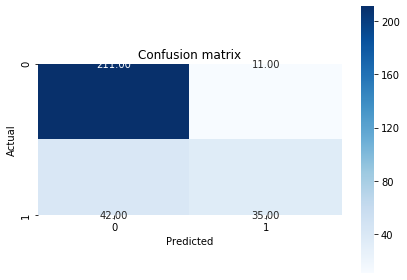

In [34]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [35]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.822742474916388 
Error =  0.17725752508361203 
Precision = [0.83399209 0.76086957] 
Recall =  [0.95045045 0.45454545] 
F1 Score =  [0.88842105 0.56910569]


In [36]:
#selecting optimal value of K
cols = [3,5,6,7,8,9,11,12]
for i in range(1,20):
    classifier = KNeighborsClassifier(n_neighbors = i,weights='distance')  
    classifier.fit(x_train_scaled.iloc[:,cols],y_train)
    y_pred = classifier.predict(x_val_scaled.iloc[:,cols])
    accuracy = metrics.accuracy_score(y_val,y_pred)
    error = 1 - accuracy
    precision = metrics.precision_score(y_val, y_pred, average = None)
    recall = metrics.recall_score(y_val, y_pred, average = None)
    F1_score = metrics.f1_score(y_val, y_pred, average = None)
    print([i,accuracy, error, precision, recall, F1_score])


[1, 0.7692307692307693, 0.23076923076923073, array([0.83406114, 0.55714286]), array([0.86036036, 0.50649351]), array([0.84700665, 0.53061224])]
[2, 0.7692307692307693, 0.23076923076923073, array([0.83406114, 0.55714286]), array([0.86036036, 0.50649351]), array([0.84700665, 0.53061224])]
[3, 0.8193979933110368, 0.1806020066889632, array([0.836     , 0.73469388]), array([0.94144144, 0.46753247]), array([0.88559322, 0.57142857])]
[4, 0.802675585284281, 0.19732441471571904, array([0.83265306, 0.66666667]), array([0.91891892, 0.46753247]), array([0.87366167, 0.54961832])]
[5, 0.8093645484949833, 0.1906354515050167, array([0.83673469, 0.68518519]), array([0.92342342, 0.48051948]), array([0.87794433, 0.5648855 ])]
[6, 0.8160535117056856, 0.18394648829431437, array([0.83805668, 0.71153846]), array([0.93243243, 0.48051948]), array([0.88272921, 0.57364341])]
[7, 0.8260869565217391, 0.17391304347826086, array([0.84274194, 0.74509804]), array([0.94144144, 0.49350649]), array([0.8893617, 0.59375  ]

#### Testing by selecting diffferent attributes

In [37]:
KNN_cols = [3,5,6,7,8,9,11,12]
KNN_classifier = KNeighborsClassifier(n_neighbors = 9)  
KNN_classifier.fit(x_train_scaled.iloc[:,KNN_cols],y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [38]:
y_pred = KNN_classifier.predict(x_val_scaled.iloc[:,KNN_cols])

In [39]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.8561872909698997 
Error =  0.14381270903010035 
Precision = [0.85943775 0.84      ] 
Recall =  [0.96396396 0.54545455] 
F1 Score =  [0.90870488 0.66141732]


[[214   8]
 [ 35  42]]


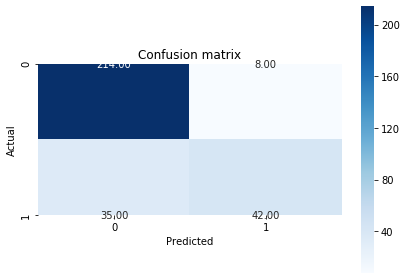

In [40]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

### Support Vector Machine (SVM)

#### Using all attributes

In [41]:
classifier = SVC(kernel = 'rbf', gamma = 'auto')  
classifier.fit(x_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
y_pred = classifier.predict(x_val_scaled)

[[216   6]
 [ 37  40]]


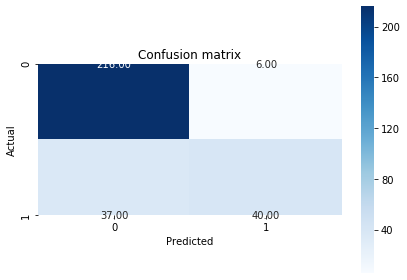

In [43]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

In [44]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.8561872909698997 
Error =  0.14381270903010035 
Precision = [0.85375494 0.86956522] 
Recall =  [0.97297297 0.51948052] 
F1 Score =  [0.90947368 0.6504065 ]


#### Testing by selecting diffferent attributes

In [45]:
SVM_cols = [2,3,6,7,8,9,11,12]
SVM_classifier = SVC(kernel = 'rbf', gamma = 'auto')  
SVM_classifier.fit(x_train_scaled.iloc[:,SVM_cols],y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
y_pred = SVM_classifier.predict(x_val_scaled.iloc[:,SVM_cols])

In [47]:
accuracy = metrics.accuracy_score(y_val,y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val, y_pred, average = None)
recall = metrics.recall_score(y_val, y_pred, average = None)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("Accuracy = ",accuracy, "\nError = ",error, "\nPrecision =",precision,"\nRecall = ", recall,"\nF1 Score = ", F1_score)

Accuracy =  0.8561872909698997 
Error =  0.14381270903010035 
Precision = [0.85943775 0.84      ] 
Recall =  [0.96396396 0.54545455] 
F1 Score =  [0.90870488 0.66141732]


[[214   8]
 [ 35  42]]


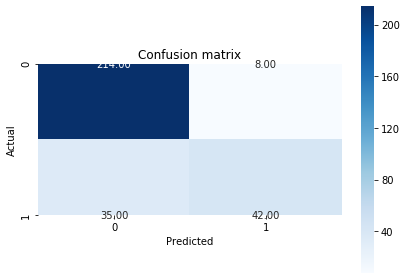

In [48]:
conf_matrix = metrics.confusion_matrix(y_val,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".2f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()
print(conf_matrix)

## Task 5 : Build Clustering model

### K Means

#### Using all attributes

In [49]:
clustering = KMeans(n_clusters = 2,init = 'random',n_init = 10, random_state = 0).fit(data_x_scaled)
clusters = clustering.labels_
print("Clusters are : ",np.unique(clusters))
print("Number of clusters = ",len(clusters))

Clusters are :  [0 1]
Number of clusters =  1195


In [50]:
adjusted_rand_index = metrics.adjusted_rand_score(data_y,clusters)
silhouette_coefficient = metrics.silhouette_score(data_x_scaled.iloc[:,cols],clusters)
print("Adjusted Random Index =",adjusted_rand_index, "\nSilhouette Coefficient = ",silhouette_coefficient)

Adjusted Random Index = 0.19751656022671712 
Silhouette Coefficient =  0.26647094360113965


[[709 150]
 [161 175]]


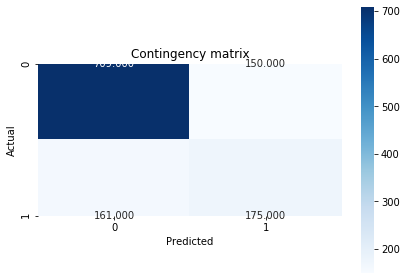

In [51]:
cont_matrix = metrics.cluster.contingency_matrix(clusters, data_y)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(cont_matrix)

#### Testing by selecting diffferent attributes

In [52]:
cols = [2,4,7,8,10,11]
clustering = KMeans(n_clusters = 2,init = 'random',n_init = 10, random_state = 0).fit(data_x_scaled.iloc[:,cols])
clusters = clustering.labels_
print("Clusters are : ",np.unique(clusters))
print("Number of clusters = ",len(clusters))

Clusters are :  [0 1]
Number of clusters =  1195


In [53]:
adjusted_rand_index = metrics.adjusted_rand_score(data_y,clusters)
silhouette_coefficient = metrics.silhouette_score(data_x_scaled.iloc[:,cols],clusters)
print("Adjusted Random Index =",adjusted_rand_index, "\nSilhouette Coefficient = ",silhouette_coefficient)

Adjusted Random Index = 0.2712192205336508 
Silhouette Coefficient =  0.3329964236009124


[[771 161]
 [ 99 164]]


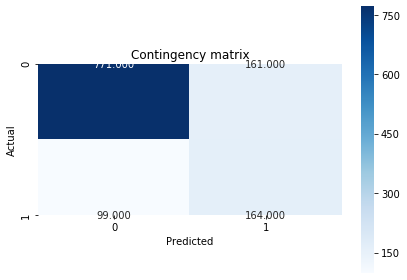

In [54]:
cont_matrix = metrics.cluster.contingency_matrix(clusters, data_y)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(cont_matrix)

### DBSCAN

#### Using all attributes

In [55]:
clustering = DBSCAN(eps = 2, min_samples = 5, metric='euclidean').fit(data_x_scaled)
clusters = clustering.labels_
print("Clusters are : ",np.unique(clusters))
print("Number of clusters = ",len(clusters))

Clusters are :  [-1  0  1]
Number of clusters =  1195


In [56]:
adjusted_rand_index = metrics.adjusted_rand_score(data_y,clusters)
silhouette_coefficient = metrics.silhouette_score(data_x_scaled.iloc[:,cols],clusters)
print("Adjusted Random Index =",adjusted_rand_index, "\nSilhouette Coefficient = ",silhouette_coefficient)

Adjusted Random Index = 0.1577583255755803 
Silhouette Coefficient =  0.32046886952277354


[[ 77  94]
 [793 225]
 [  0   6]]


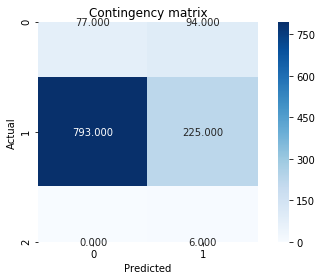

In [57]:
cont_matrix = metrics.cluster.contingency_matrix(clusters,data_y)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(cont_matrix)

#### Testing by selecting diffferent attributes

In [112]:
#cols = [2,4,7,8,10,11]
cols = [0,1,2,4]
clustering = DBSCAN(eps = 2, min_samples = 5, metric='euclidean').fit(data_x_scaled.iloc[:,cols])
print("Clusters are : ",np.unique(clusters))
print("Number of clusters = ",len(clusters))

Clusters are :  [-1  0  1]
Number of clusters =  1195


In [113]:
adjusted_rand_index = metrics.adjusted_rand_score(data_y,clusters)
silhouette_coefficient = metrics.silhouette_score(data_x_scaled.iloc[:,cols],clusters)
print("Adjusted Random Index =",adjusted_rand_index, "\nSilhouette Coefficient = ",silhouette_coefficient)

Adjusted Random Index = 0.1577583255755803 
Silhouette Coefficient =  0.48874944443295015


[[ 77  94]
 [793 225]
 [  0   6]]


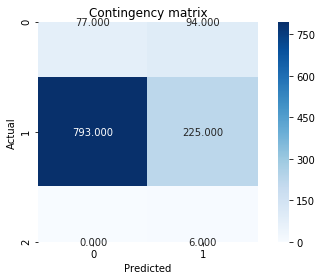

In [114]:
cont_matrix = metrics.cluster.contingency_matrix(clusters,data_y)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()
print(cont_matrix)

## Task 6 : Create choropleth map for the counties 

In [61]:
fips = original_election_data['FIPS']
data = original_election_data.iloc[:,3:-3]
scaler = StandardScaler()

In [62]:
scaler.fit(data)
data_scaled = scaler.transform(data)
data_scaled = pd.DataFrame(data_scaled)

In [63]:
class_pred = SVM_classifier.predict(data_scaled.iloc[:,SVM_cols])

In [64]:
data_scaled['Class'] = class_pred
data_scaled['FIPS'] = fips

In [65]:
data_scaled.head()

0         1         2         3         4         5         6  \
0 -0.152853 -3.066408 -0.546700 -0.289050 -0.553790  0.320582  1.620631   
1  0.022271 -1.155992 -0.199124  1.514068  1.052585 -0.322286  0.205758   
2  0.053284 -1.241056 -0.454493  0.202878 -0.041507  0.313476  2.170666   
3 -0.212974 -0.805440 -0.539561  0.509422 -0.136432  0.193451 -0.801971   
4 -0.262063 -1.400971 -0.403982  1.367985 -0.113976 -1.481202  1.716496   

          7         8         9        10        11        12  Class  FIPS  
0 -1.006762 -1.436102  3.343006  1.296373  1.125274  0.566216      1  4001  
1  0.345583 -0.385256  0.731355 -0.003412 -0.193512 -0.610414      0  4003  
2 -1.521317  0.080115  0.612753 -0.365179 -1.396980 -0.761077      1  4005  
3  1.741474 -0.774759  2.016498  0.357888  0.397628 -0.462060      0  4007  
4 -1.218263 -0.219453  2.844026  0.178987  0.878479 -0.294559      0  4009

### Project 2 Map

In [67]:
fips = data_scaled['FIPS']
values = data_scaled['Class']
fig = ff.create_choropleth(fips=fips, values=values,colorscale=['red','blue'],title='Project 2 : How USA Voted',legend_title='Democratic County or Not')
fig.layout.template = None
fig.show()

### Project 1 Map

In [68]:
fips = original_election_data['FIPS']
values = original_election_data['Party']
fig = ff.create_choropleth(fips=fips, values=values,colorscale=['red','blue'],title='Project 1 : How USA Voted',legend_title='Democratic County or Not')
fig.layout.template = None
fig.show()

## Task 7 : Using best performing models on testing dataset

In [69]:
prediction = test_data[['State','County']]

### Predict Democratic Party votes

In [70]:
predicted = demo_fitted_model.predict(test_data_scaled.iloc[:, demo_cols])

In [71]:
#predicted[predicted < 0] = 0 
prediction['Democratic'] = predicted

### Predict Republican Party votes

In [72]:
predicted = repub_fitted_model.predict(test_data_scaled.iloc[:, repub_cols])

In [73]:
#predicted[predicted < 0] = 0
prediction['Republican'] = predicted

### Predict winning Party (using SVM)

In [74]:
class_pred = SVM_classifier.predict(test_data_scaled.iloc[:,SVM_cols])

In [75]:
prediction['Party'] = class_pred

In [76]:
#prediction['Party'] = np.where(prediction['Democratic'] > prediction['Republican'], 1, 0)
prediction.head(10)

State       County     Democratic    Republican  Party
0    NV       eureka   10348.863597   4340.081194      1
1    TX       zavala       0.000000      0.000000      0
2    VA  king george   49592.687958   6261.083197      1
3    OH     hamilton  422219.367375  78704.729051      1
4    TX       austin   25431.101865   5579.948775      1
5    MI        barry   37938.948938   8093.733811      1
6    NM     valencia   46451.932733   7679.898972      1
7    TX        ellis   83341.506653  16900.949218      1
8    NJ       mercer  229639.199389  40011.561586      1
9    PA      cambria   83333.533575  15990.291551      1

In [88]:
prediction.to_csv('project2_output.csv')